In [16]:
import scipy.io
import pandas as pd
import numpy as np
import os.path
from os import path
from os.path import exists
import matplotlib.pyplot as plt

In [17]:
def Read(path,index,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb):
    filename = "data_virusprods{}_virusdiff{}_ifnprods{}_ifndiff{}_ifnprob{}_virusreduct{}_isstochastic{}_initialvirus{}_{}_{}_run{}".format(ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb,index)                                            
    df = pd.read_csv("./{}/data/{}.csv".format(path,filename))
    
    return df

def AllRead(path,InitialRun,FinalRun,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb):
    result = []
    for i in range(InitialRun,FinalRun):
        filename = "./{}/data/data_virusprods{}_virusdiff{}_ifnprods{}_ifndiff{}_ifnprob{}_virusreduct{}_isstochastic{}_initialvirus{}_{}_{}_run{}.csv".format(path,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb,i)                                        
        if exists(filename): 
            if exists(filename):
                df = Read(path,i,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,isstochastic,s1,s2,vnumb)
                result.append(df)
            else:
                print("{} is missing.".format(filename))
    dftot = pd.concat(result)
    return dftot


In [18]:
def CalculateFirstIFN(df,s1,s2,vnumb,ifn_prods,isstochastic):
    header = ["infected.max","ifn.first","s1","s2","vnumb","ifn_prods","isstochastic"]
    
    total=[]
    
    for i in df["run"].unique():
        df0=df[df["run"]==i]
        infected = df0['infected'].to_numpy()
        protected = df0['protected'].to_numpy()
        dead=df0['dead'].to_numpy()
        exposure=df0['exposure'].to_numpy()
        viruscell=df0['viruscell'].to_numpy()
        viruscontact=df0['viruscontact'].to_numpy()
        ifncell=df0['ifncell'].to_numpy()
        ifncontact=df0['ifncontact'].to_numpy()
        j = 0
        ifncelli = ifncell[j]
        ifncellfirst=j
        size=len(df0["step"])
        while ifncelli==0 and j<size-1:
            #print(isstochastic,s1,s2,vnumb,ifn_prods,i,j,ifncelli)
            j+=1
            ifncelli = ifncell[j]
        ifncellfirst = j
        if ifncellfirst < size-1:
            data = [[infected.max(),ifncellfirst,s1,s2,vnumb,ifn_prods,isstochastic]]
            #print(data)
            result = pd.DataFrame(data, columns=header)
            total.append(result)
    dfnew = pd.concat(total)
    return dfnew
        

In [19]:
ivirus_prods=2
ivirus_diff=1
iifn_diff=5
iifn_prob=0.01
ivirus_reduction=0.5
ifn_prods=[1,3,6,10]
initial_virus=[[1,1,1]]
isstochastic = [[0,"homogenous"],[1,"stochastic"]]
#ifn_prods=[10]
#initial_virus=[[200,500,100]]
for Is, name in isstochastic:
    for s1,s2,vnumb in initial_virus:
        for iifn_prods in ifn_prods:
            path1 = "initial_virus/{}/{}_{}_{}/{}".format(name,s1,s2,vnumb,iifn_prods)
            
            df1=AllRead(path1,0,100,ivirus_prods,ivirus_diff,iifn_prods,iifn_diff,iifn_prob,ivirus_reduction,Is,s1,s2,vnumb)
            dfnew=CalculateFirstIFN(df1,s1,s2,vnumb,iifn_prods,Is)
            #print(dfnew)
            dfnew.to_csv("maxinfected_firstifn_isstochastic{}_initialvirus{}_{}_{}_ifnprods{}.csv".format(Is,s1,s2,vnumb,iifn_prods))
            #plot_maxinfected_firstifn(dfnew)


In [20]:
def plot_maxinfected_firstifn(df1,df2,s1,s2,vnumb,ifn_prods):
    
    plt.figure(figsize=(4, 3))
    
    plt.scatter(df1['ifn.first']/48.,df1['infected.max'],marker='o',color='r',label="Stochastic")
    #plt.scatter(df2['ifn.first']/48.,df2['infected.max'],marker='o',color='b',label="Homogenous")
    plt.ylabel("Maximum infected cell number")
    plt.xlabel("Days when first IFN-generating cell")
    #plt.yscale("log")
    plt.subplots_adjust(left=0.24, right=0.97, top=0.9, bottom=0.15)
    #plt.text(9, 2e4, r'$(C)$', fontdict=font)
    plt.title("[[{},{}],{}],IFN production = {}".format(s1,s2,vnumb,ifn_prods))
    plt.legend()
    plt.savefig("./figure/maxinfected_firstifn_initialvirus{}_{}_{}_ifnprods{}.pdf".format(s1,s2,vnumb,ifn_prods))
    plt.show()
    return 0

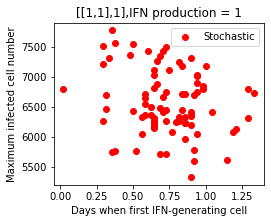

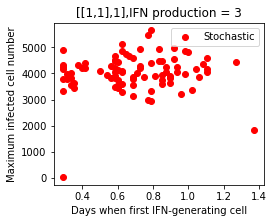

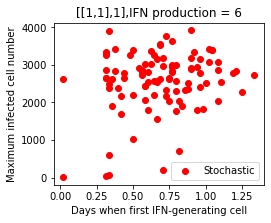

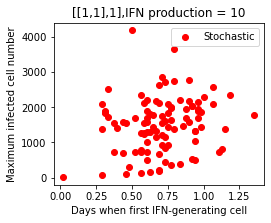

In [21]:
initial_virus=[[1,1,1]]
ifn_prods=[1,3,6,10]
for s1,s2,vnumb in initial_virus:
    for iifn_prods in ifn_prods:
        data1 = "./maxinfected_firstifn_isstochastic1_initialvirus{}_{}_{}_ifnprods{}.csv".format(s1,s2,vnumb,iifn_prods)
        data2 = "./maxinfected_firstifn_isstochastic0_initialvirus{}_{}_{}_ifnprods{}.csv".format(s1,s2,vnumb,iifn_prods)
        df1 = pd.read_csv(data1)
        df2 = pd.read_csv(data2)
        plot_maxinfected_firstifn(df1,df2,s1,s2,vnumb,iifn_prods)